<a href="https://colab.research.google.com/github/taniasuchi07/Technical-Assessment/blob/main/QMH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

# 1. Generate synthetic manufacturing data
np.random.seed(42)
n = 1000
timestamps = pd.date_range(start="2023-01-01", periods=n, freq="T")

# Pressure sensors (sine + noise)
PS1 = 10 + np.sin(np.linspace(0, 20, n)) + np.random.normal(0, 0.5, n)
PS2 = 8 + np.sin(np.linspace(0, 20, n) + 1) + np.random.normal(0, 0.4, n)
PS3 = 9 + np.sin(np.linspace(0, 20, n) + 2) + np.random.normal(0, 0.3, n)
PS4 = 11 + np.sin(np.linspace(0, 20, n) + 3) + np.random.normal(0, 0.6, n)

# Temperature sensors (random walk)
TS1 = np.cumsum(np.random.normal(0, 0.05, n)) + 25
TS2 = np.cumsum(np.random.normal(0, 0.04, n)) + 24

# Vibration sensor (noise)
VS1 = np.random.normal(0, 1, n)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'PS1': PS1, 'PS2': PS2, 'PS3': PS3, 'PS4': PS4,
    'TS1': TS1, 'TS2': TS2, 'VS1': VS1
})

# Inject anomalies in PS1
anomaly_indices = np.random.choice(n, size=30, replace=False)
df['anomaly'] = 0
df.loc[anomaly_indices, 'PS1'] += np.random.uniform(5, 8, size=30)
df.loc[anomaly_indices, 'anomaly'] = 1

# Binary target variable (simulate product defects)
df['target'] = (df['PS3'] > df['PS3'].mean() + df['PS3'].std()).astype(int)

# 2. Forecasting with rolling mean
df['ps1_forecast'] = df['PS1'].rolling(window=5, min_periods=1).mean().shift(1).fillna(method='bfill')

# 3. Train RandomForest model
feature_cols = ['PS1', 'PS2', 'PS3', 'PS4', 'TS1', 'TS2', 'VS1']
X = df[feature_cols].values
y = df['target'].values
clf = RandomForestClassifier(n_estimators=100, random_state=42)
start = time.time()
clf.fit(X, y)
train_time = time.time() - start

# Inference latency measurement
latencies_ms, preds = [], []
for i in range(len(X)):
    s0 = time.time()
    p = clf.predict(X[i].reshape(1, -1))
    s1 = time.time()
    latencies_ms.append((s1 - s0) * 1000)
    preds.append(p[0])

# Metrics
y_pred = np.array(preds)
acc = accuracy_score(y, y_pred)

/tmp/ipython-input-1469889704.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start="2023-01-01", periods=n, freq="T")
/tmp/ipython-input-1469889704.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ps1_forecast'] = df['PS1'].rolling(window=5, min_periods=1).mean().shift(1).fillna(method='bfill')


/tmp/ipython-input-1732018928.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start="2023-01-01", periods=n, freq="T")
/tmp/ipython-input-1732018928.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ps1_forecast'] = df['PS1'].rolling(window=5, min_periods=1).mean().shift(1).fillna(method='bfill')


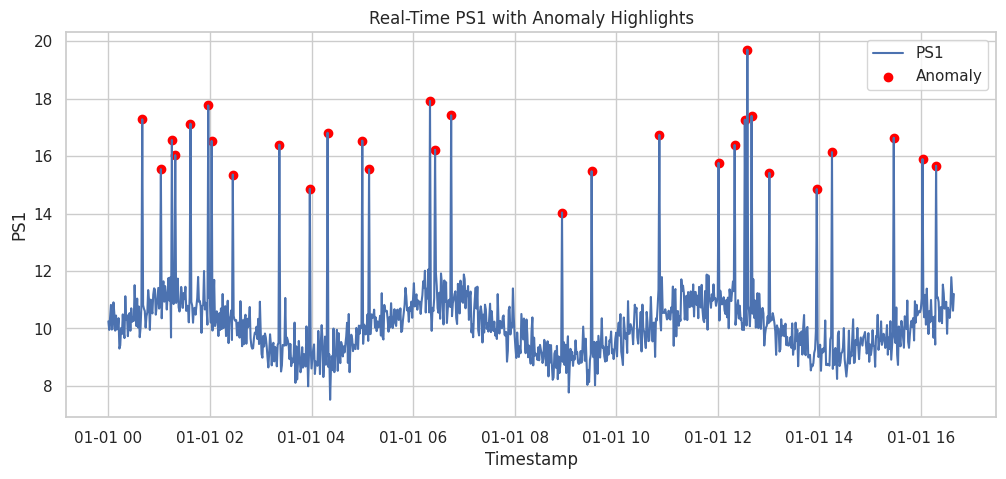

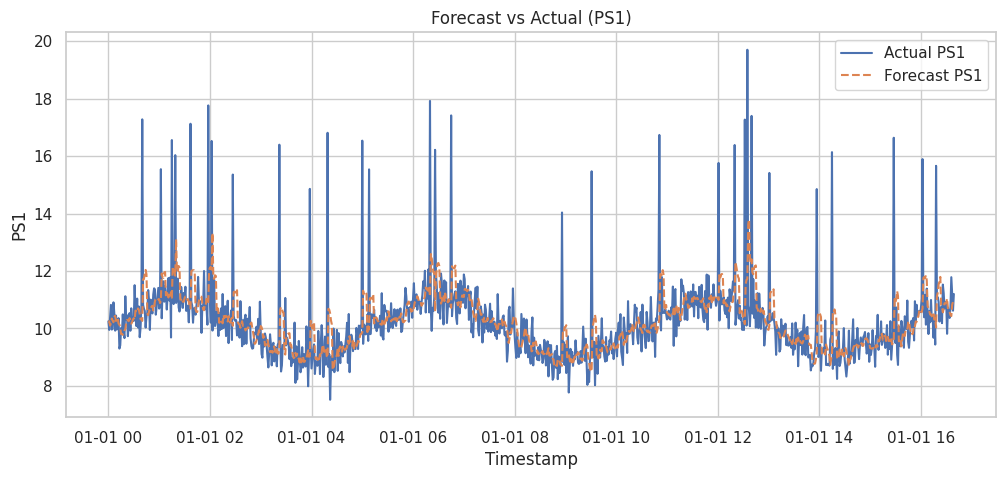

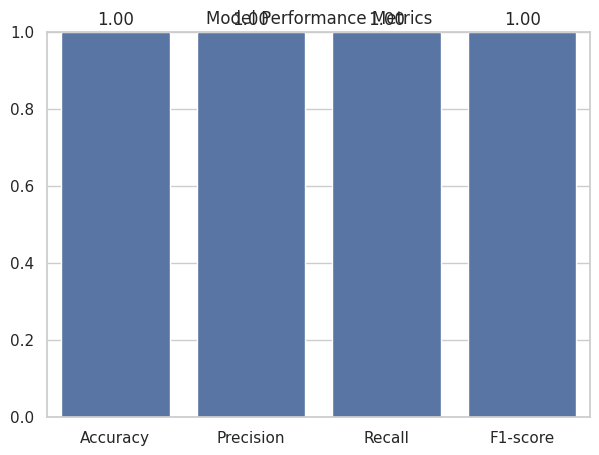

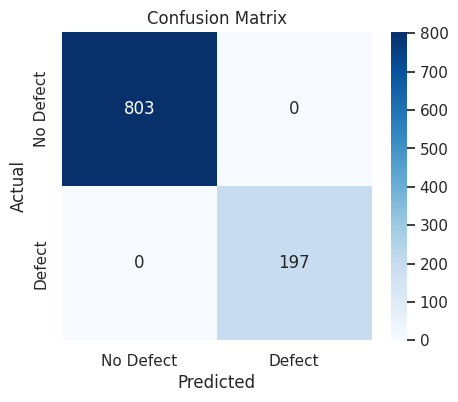

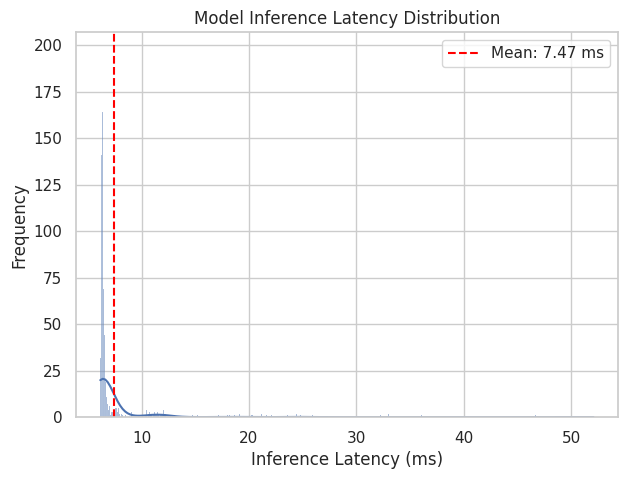

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

# 1. Generate synthetic manufacturing data
np.random.seed(42)
n = 1000
timestamps = pd.date_range(start="2023-01-01", periods=n, freq="T")

# Pressure sensors (sine + noise)
PS1 = 10 + np.sin(np.linspace(0, 20, n)) + np.random.normal(0, 0.5, n)
PS2 = 8 + np.sin(np.linspace(0, 20, n) + 1) + np.random.normal(0, 0.4, n)
PS3 = 9 + np.sin(np.linspace(0, 20, n) + 2) + np.random.normal(0, 0.3, n)
PS4 = 11 + np.sin(np.linspace(0, 20, n) + 3) + np.random.normal(0, 0.6, n)

# Temperature sensors (random walk)
TS1 = np.cumsum(np.random.normal(0, 0.05, n)) + 25
TS2 = np.cumsum(np.random.normal(0, 0.04, n)) + 24

# Vibration sensor (noise)
VS1 = np.random.normal(0, 1, n)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'PS1': PS1, 'PS2': PS2, 'PS3': PS3, 'PS4': PS4,
    'TS1': TS1, 'TS2': TS2, 'VS1': VS1
})

# Inject anomalies in PS1
anomaly_indices = np.random.choice(n, size=30, replace=False)
df['anomaly'] = 0
df.loc[anomaly_indices, 'PS1'] += np.random.uniform(5, 8, size=30)
df.loc[anomaly_indices, 'anomaly'] = 1

# Binary target variable (simulate product defects)
df['target'] = (df['PS3'] > df['PS3'].mean() + df['PS3'].std()).astype(int)

# 2. Forecasting with rolling mean
df['ps1_forecast'] = df['PS1'].rolling(window=5, min_periods=1).mean().shift(1).fillna(method='bfill')

# 3. Train RandomForest model
feature_cols = ['PS1', 'PS2', 'PS3', 'PS4', 'TS1', 'TS2', 'VS1']
X = df[feature_cols].values
y = df['target'].values
clf = RandomForestClassifier(n_estimators=100, random_state=42)
start = time.time()
clf.fit(X, y)
train_time = time.time() - start

# Inference latency measurement
latencies_ms, preds = [], []
for i in range(len(X)):
    s0 = time.time()
    p = clf.predict(X[i].reshape(1, -1))
    s1 = time.time()
    latencies_ms.append((s1 - s0) * 1000)
    preds.append(p[0])

# Metrics
y_pred = np.array(preds)
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred, zero_division=0)
rec = recall_score(y, y_pred, zero_division=0)
f1 = f1_score(y, y_pred, zero_division=0)

# 4. Plots
sns.set(style="whitegrid")

# Chart 1: Real-time PS1 trend with anomalies
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['PS1'], label='PS1')
plt.scatter(df.loc[df['anomaly']==1, 'timestamp'], df.loc[df['anomaly']==1, 'PS1'], color='red', label='Anomaly')
plt.xlabel("Timestamp")
plt.ylabel("PS1")
plt.title("Real-Time PS1 with Anomaly Highlights")
plt.legend()
plt.show()

# Chart 2: Forecast vs Actual (PS1)
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['PS1'], label='Actual PS1')
plt.plot(df['timestamp'], df['ps1_forecast'], label='Forecast PS1', linestyle='--')
plt.xlabel("Timestamp")
plt.ylabel("PS1")
plt.title("Forecast vs Actual (PS1)")
plt.legend()
plt.show()

# Chart 3: Model performance metrics
metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}
plt.figure(figsize=(7,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0,1)
plt.title("Model Performance Metrics")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# Chart 4: Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Chart 5: Latency distribution
plt.figure(figsize=(7,5))
sns.histplot(latencies_ms, kde=True)
plt.axvline(np.mean(latencies_ms), color='red', linestyle='--', label=f"Mean: {np.mean(latencies_ms):.2f} ms")
plt.xlabel("Inference Latency (ms)")
plt.ylabel("Frequency")
plt.title("Model Inference Latency Distribution")
plt.legend()
plt.show()


/tmp/ipython-input-2218982326.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2021-01-01", end="2025-06-30", freq="H")  # Hourly data
/tmp/ipython-input-2218982326.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ps1_forecast'] = df['PS1'].rolling(window=5, min_periods=1).mean().shift(1).fillna(method='bfill')


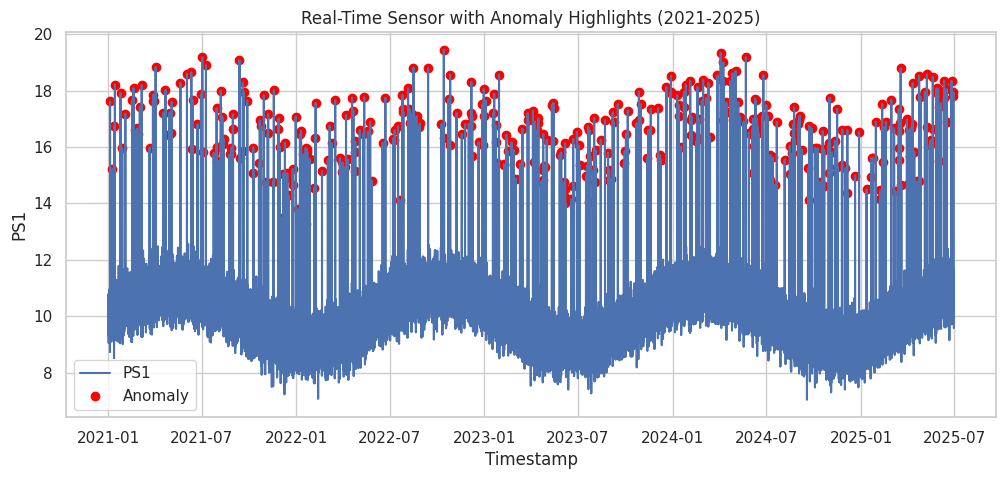

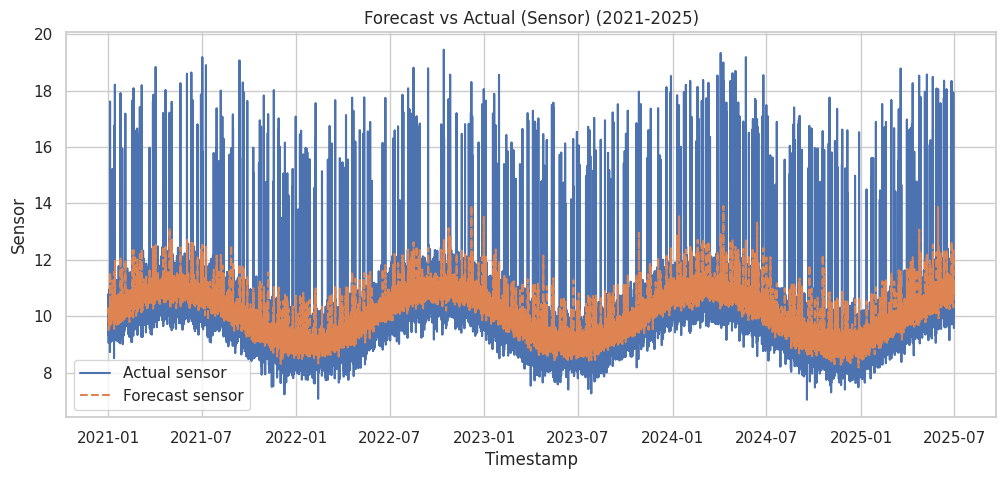

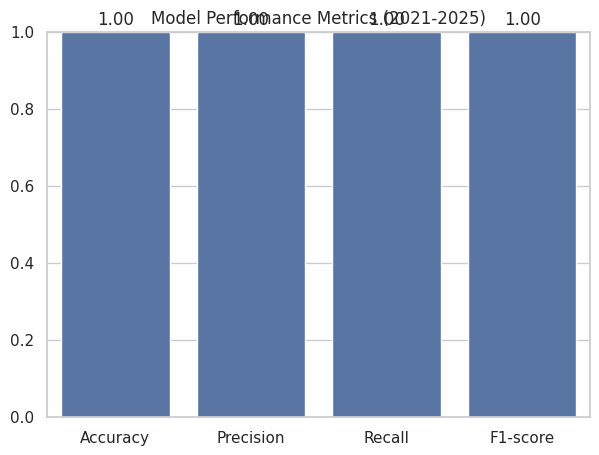

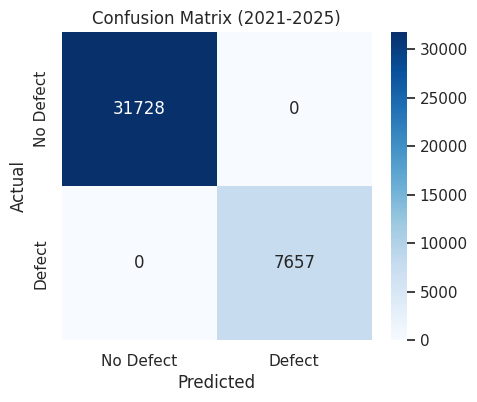

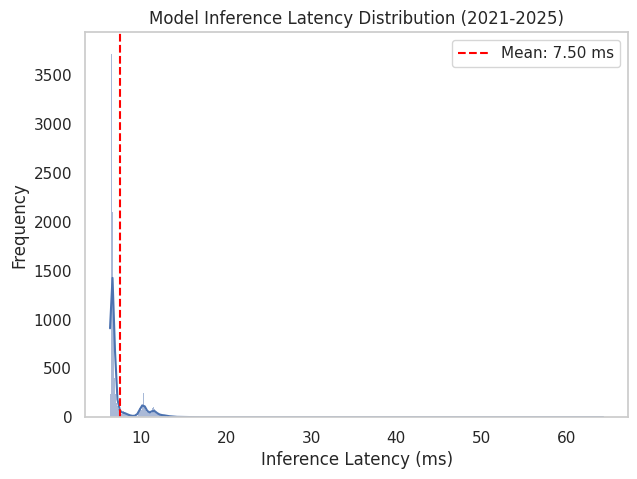

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

# 1. Generate synthetic manufacturing data
np.random.seed(42)

# Generate timestamps spanning from 2021 to 2025
timestamps = pd.date_range(start="2021-01-01", end="2025-06-30", freq="H")  # Hourly data
n = len(timestamps)  # Number of data points

# Pressure sensors (sine + noise)
PS1 = 10 + np.sin(np.linspace(0, 20, n)) + np.random.normal(0, 0.5, n)
PS2 = 8 + np.sin(np.linspace(0, 20, n) + 1) + np.random.normal(0, 0.4, n)
PS3 = 9 + np.sin(np.linspace(0, 20, n) + 2) + np.random.normal(0, 0.3, n)
PS4 = 11 + np.sin(np.linspace(0, 20, n) + 3) + np.random.normal(0, 0.6, n)

# Temperature sensors (random walk)
TS1 = np.cumsum(np.random.normal(0, 0.05, n)) + 25
TS2 = np.cumsum(np.random.normal(0, 0.04, n)) + 24

# Vibration sensor (noise)
VS1 = np.random.normal(0, 1, n)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'PS1': PS1, 'PS2': PS2, 'PS3': PS3, 'PS4': PS4,
    'TS1': TS1, 'TS2': TS2, 'VS1': VS1
})

# Inject anomalies in PS1
anomaly_indices = np.random.choice(n, size=int(0.01 * n), replace=False)  # ~1% anomalies
df['anomaly'] = 0
df.loc[anomaly_indices, 'PS1'] += np.random.uniform(5, 8, size=len(anomaly_indices))
df.loc[anomaly_indices, 'anomaly'] = 1

# Binary target variable (simulate product defects)
df['target'] = (df['PS3'] > df['PS3'].mean() + df['PS3'].std()).astype(int)

# 2. Forecasting with rolling mean
df['ps1_forecast'] = df['PS1'].rolling(window=5, min_periods=1).mean().shift(1).fillna(method='bfill')

# 3. Train RandomForest model
feature_cols = ['PS1', 'PS2', 'PS3', 'PS4', 'TS1', 'TS2', 'VS1']
X = df[feature_cols].values
y = df['target'].values
clf = RandomForestClassifier(n_estimators=100, random_state=42)
start = time.time()
clf.fit(X, y)
train_time = time.time() - start

# Inference latency measurement
latencies_ms, preds = [], []
for i in range(len(X)):
    s0 = time.time()
    p = clf.predict(X[i].reshape(1, -1))
    s1 = time.time()
    latencies_ms.append((s1 - s0) * 1000)
    preds.append(p[0])

# Metrics
y_pred = np.array(preds)
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred, zero_division=0)
rec = recall_score(y, y_pred, zero_division=0)
f1 = f1_score(y, y_pred, zero_division=0)

# 4. Plots
sns.set(style="whitegrid")

# Chart 1: Real-time PS1 trend with anomalies
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['PS1'], label='PS1')
plt.scatter(df.loc[df['anomaly']==1, 'timestamp'], df.loc[df['anomaly']==1, 'PS1'], color='red', label='Anomaly')
plt.xlabel("Timestamp")
plt.ylabel("PS1")
plt.title("Real-Time Sensor with Anomaly Highlights (2021-2025)")
plt.legend()
plt.show()

# Chart 2: Forecast vs Actual (PS1)
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['PS1'], label='Actual sensor')
plt.plot(df['timestamp'], df['ps1_forecast'], label='Forecast sensor', linestyle='--')
plt.xlabel("Timestamp")
plt.ylabel("Sensor")
plt.title("Forecast vs Actual (Sensor) (2021-2025)")
plt.legend()
plt.show()

# Chart 3: Model performance metrics
metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}
plt.figure(figsize=(7,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0,1)
plt.title("Model Performance Metrics (2021-2025)")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# Chart 4: Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Defect", "Defect"], yticklabels=["No Defect", "Defect"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (2021-2025)")
plt.show()

# Chart 5: Latency distribution
plt.figure(figsize=(7,5))
sns.histplot(latencies_ms, kde=True)
plt.axvline(np.mean(latencies_ms), color='red', linestyle='--', label=f"Mean: {np.mean(latencies_ms):.2f} ms")
plt.xlabel("Inference Latency (ms)")
plt.ylabel("Frequency")
plt.title("Model Inference Latency Distribution (2021-2025)")
plt.legend()
plt.grid(False)
plt.show()

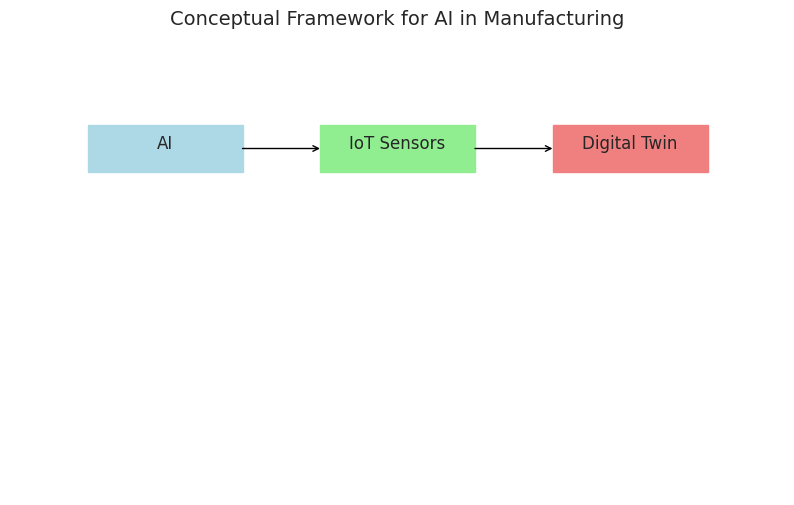

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch

fig, ax = plt.subplots(figsize=(10, 6))

# Add rectangles for key concepts
ax.add_patch(Rectangle((0.1, 0.7), 0.2, 0.1, color='lightblue', label='AI'))
ax.text(0.2, 0.75, 'AI', fontsize=12, ha='center')

ax.add_patch(Rectangle((0.4, 0.7), 0.2, 0.1, color='lightgreen', label='IoT Sensors'))
ax.text(0.5, 0.75, 'IoT Sensors', fontsize=12, ha='center')

ax.add_patch(Rectangle((0.7, 0.7), 0.2, 0.1, color='lightcoral', label='Digital Twin'))
ax.text(0.8, 0.75, 'Digital Twin', fontsize=12, ha='center')

# Add connections between concepts
con1 = ConnectionPatch((0.3, 0.75), (0.4, 0.75), "data", "data", arrowstyle="->", color="black")
con2 = ConnectionPatch((0.6, 0.75), (0.7, 0.75), "data", "data", arrowstyle="->", color="black")
ax.add_artist(con1)
ax.add_artist(con2)

# Add title
plt.title("Conceptual Framework for AI in Manufacturing", fontsize=14)
plt.axis('off')
plt.show()

In [ ]:
from graphviz import Digraph

dot = Digraph()

# Add nodes for each step
dot.node('A', 'Literature Review (2020–2025)')
dot.node('B', 'Data Collection (IoT, Sensors)')
dot.node('C', 'Empirical Simulation')
dot.node('D', 'Analysis (AI Models)')
dot.node('E', 'Results & Insights')

# Add edges between nodes
dot.edges(['AB', 'BC', 'CD', 'DE'])

# Render the flowchart
dot.attr(size='10,6')
dot.render('methodology_flowchart', format='png', view=True)

'methodology_flowchart.png'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/slr_dataset_inferred.csv')

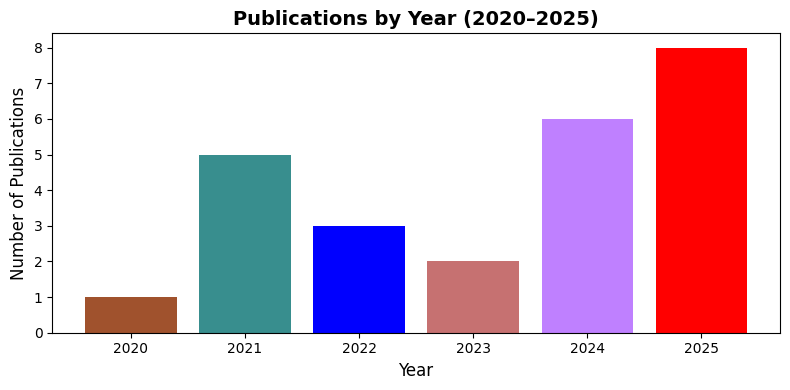

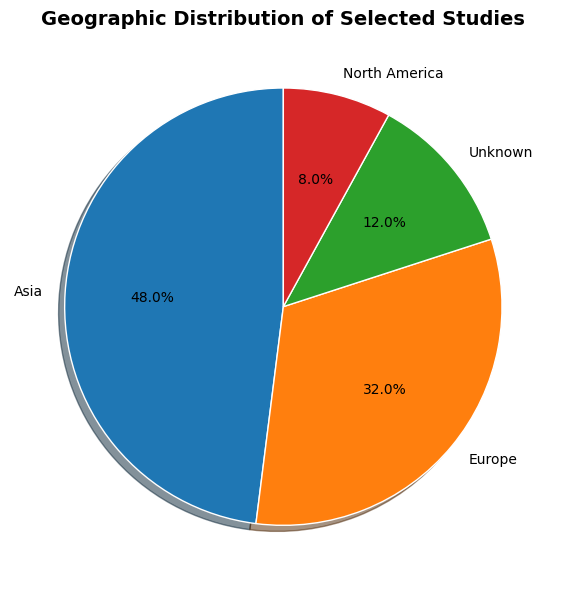

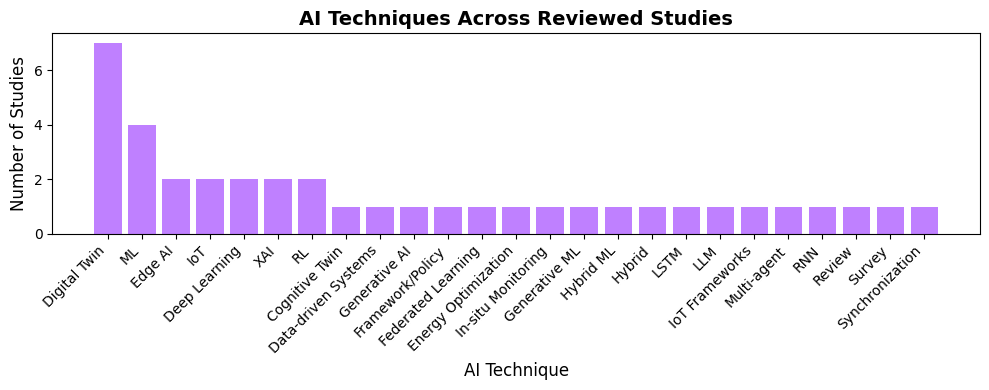

<Figure size 1000x600 with 0 Axes>

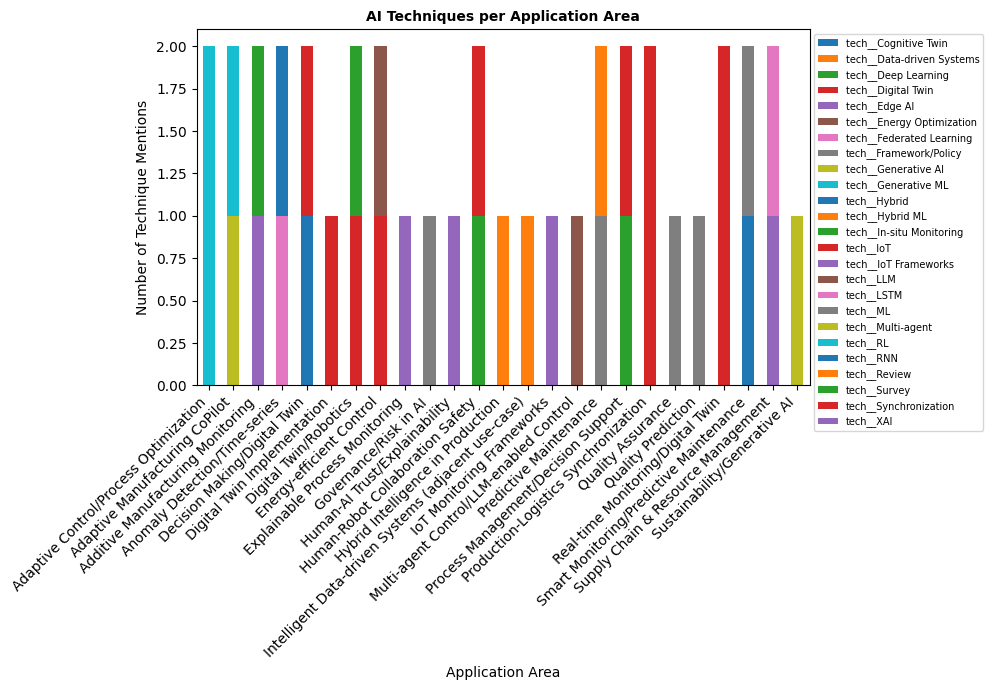

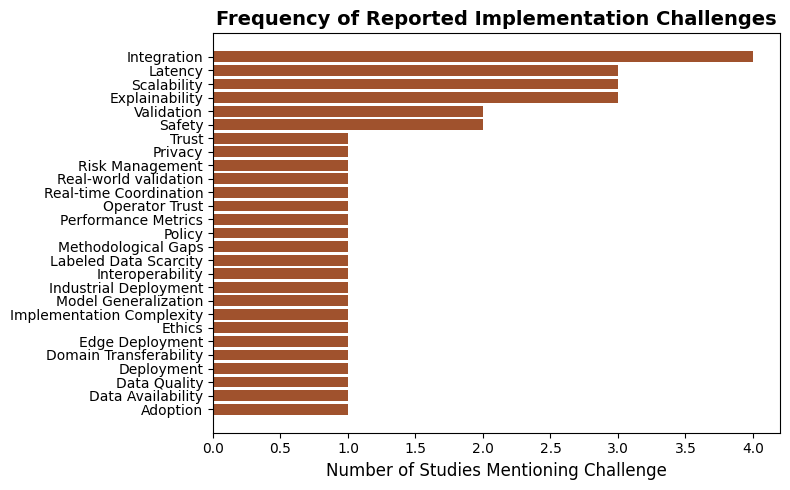

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. Load Dataset
# =========================
# You can replace this with your corrected CSV path
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/slr_dataset_inferred.csv')

# Extract columns
tech_cols = [c for c in df.columns if c.startswith("tech__")]
ch_cols = [c for c in df.columns if c.startswith("ch__")]

# =========================
# 2. Publications by Year (Bar Chart)
# =========================
pub_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,4))
plt.bar(pub_by_year.index.astype(str), pub_by_year.values, color=['#A0522D', '#388E8E', 'blue', '#C67171', '#bf80ff', '#FF0000'])
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
plt.title("Publications by Year (2020–2025)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# =========================
# 3. Geographic Distribution (Pie Chart)
# =========================
region_counts = df['region'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(region_counts.values, labels=region_counts.index,
        autopct='%1.1f%%', startangle=90, shadow=True,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title("Geographic Distribution of Selected Studies", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# =========================
# 4. AI Techniques Frequency (Grouped Bar Chart)
# =========================
tech_counts = df[tech_cols].sum().sort_values(ascending=False)
tech_names = [c.replace("tech__", "") for c in tech_counts.index]

plt.figure(figsize=(10,4))
plt.bar(tech_names, tech_counts.values, color=[ '#bf80ff'])
plt.xlabel("AI Technique", fontsize=12)
plt.ylabel("Number of Studies", fontsize=12)
plt.title("AI Techniques Across Reviewed Studies", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# =========================
# 5. AI Techniques per Application Area (Stacked Bar Chart)
# =========================
grouped = df.groupby('application_area')[tech_cols].sum()

plt.figure(figsize=(10,6))
grouped.plot(kind='bar', stacked=True, figsize=(10,7))
plt.xlabel("Application Area", fontsize=10)
plt.ylabel("Number of Technique Mentions", fontsize=10)
plt.title("AI Techniques per Application Area", fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1,1), fontsize=7)
plt.tight_layout()
plt.show()

# =========================
# 6. Implementation Challenges Frequency (Horizontal Bar Chart)
# =========================
ch_counts = df[ch_cols].sum().sort_values(ascending=True)
ch_names = [c.replace("ch__", "") for c in ch_counts.index]

plt.figure(figsize=(8,5))
plt.barh(ch_names, ch_counts.values, color=['#A0522D'])
plt.xlabel("Number of Studies Mentioning Challenge", fontsize=12)
plt.title("Frequency of Reported Implementation Challenges", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

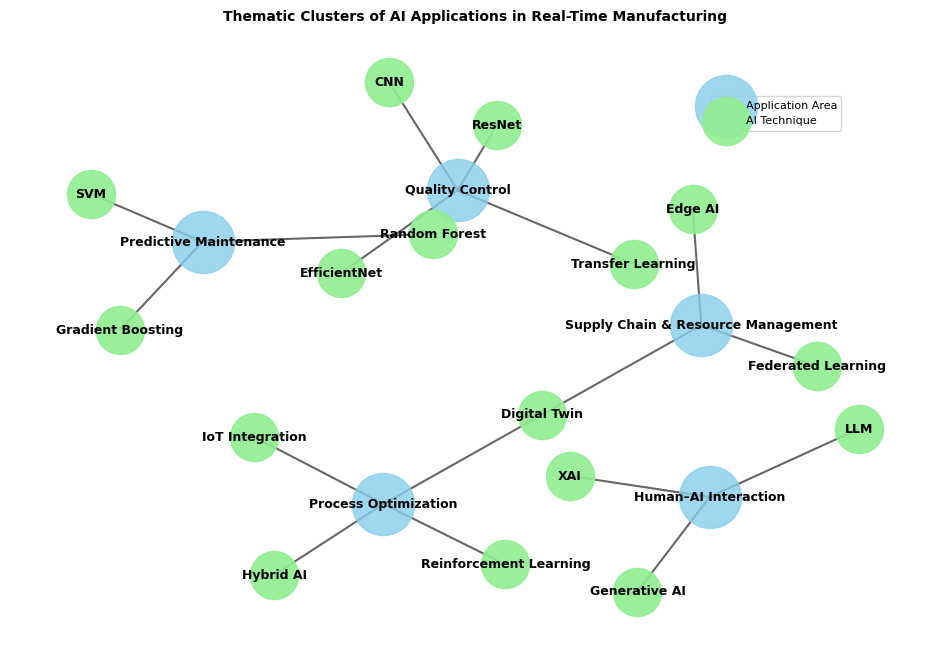

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define clusters and AI techniques
clusters = {
    "Predictive Maintenance": ["Random Forest", "Gradient Boosting", "SVM"],
    "Quality Control": ["CNN", "Transfer Learning", "EfficientNet", "ResNet"],
    "Process Optimization": ["Reinforcement Learning", "Hybrid AI", "Digital Twin", "IoT Integration"],
    "Supply Chain & Resource Management": ["Federated Learning", "Edge AI", "Digital Twin"],
    "Human–AI Interaction": ["Generative AI", "LLM", "XAI"]
}

# Create graph
G = nx.Graph()

# Add nodes and edges
for cluster, techniques in clusters.items():
    G.add_node(cluster, type='cluster')
    for tech in techniques:
        G.add_node(tech, type='tech')
        G.add_edge(cluster, tech)

# Define positions using bipartite layout
pos = nx.spring_layout(G, k=0.6, seed=42)

# Separate nodes by type for coloring
cluster_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'cluster']
tech_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'tech']

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, nodelist=cluster_nodes, node_color='skyblue', node_size=2000, alpha=0.8, label="Application Area")
nx.draw_networkx_nodes(G, pos, nodelist=tech_nodes, node_color='lightgreen', node_size=1200, alpha=0.9, label="AI Technique")
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

plt.title("Thematic Clusters of AI Applications in Real-Time Manufacturing", fontsize=10, fontweight='bold')
plt.legend(scatterpoints=1, bbox_to_anchor=(0.9,0.9), fontsize=8)
plt.axis('off')
plt.show()


Text(0, 0.5, 'Cumulative Number of Publications')

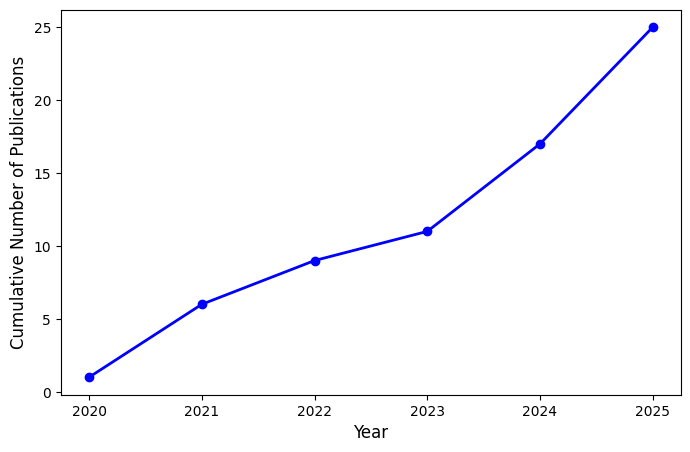

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your file path if needed)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/slr_dataset_inferred.csv")

# Count publications per year and sort
pubs_by_year = df['year'].value_counts().sort_index()

# Create cumulative sum
cumulative_pubs = pubs_by_year.cumsum()

# Plot cumulative publications
plt.figure(figsize=(8,5))
plt.plot(cumulative_pubs.index, cumulative_pubs.values, marker='o', linewidth=2, color='blue')

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative Number of Publications", fontsize=12)
